In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
df = pd.read_csv("/content/PoliticalAds.csv")

In [ ]:
df.head()

,ADID,CreativeUrl,Currency Code,Spend,Impressions,StartDate,EndDate,OrganizationName,BillingAddress,CandidateBallotInformation,PayingAdvertiserName,Gender,AgeBracket,CountryCode,Regions (Included),Regions (Excluded),Electoral Districts (Included),Electoral Districts (Excluded),Radius Targeting (Included),Radius Targeting (Excluded),Metros (Included),Metros (Excluded),Postal Codes (Included),Postal Codes (Excluded),Location Categories (Included),Location Categories (Excluded),Interests,OsType,Segments,Language,AdvancedDemographics,Targeting Connection Type,Targeting Carrier (ISP),CreativeProperties
0,069d4ce0a287ecbd8afab55b3ce4f364291750d33c60c9...,https://www.snap.com/political-ads/asset/bfd93...,USD,500,93374,2020/10/18 00:38:27Z,2020/10/23 23:59:59Z,Riveter Digital,US,NaN,Bennett for Senate,NaN,NaN,united states,NaN,NaN,NaN,NaN,latitude 40.11054;longitude -88.2269005;radius...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,web_view_url:https://bennettforsenate.com/voting/
1,f49b53a2eee07235d0081b56f08aba300cfdd5ea950bf4...,https://www.snap.com/political-ads/asset/f0fe5...,USD,44,15510,2020/11/29 22:10:00Z,2020/12/04 20:59:00Z,Senyar Group Agency,"Press Street,Shewikh,11111,KW",Ahmad AlFadhel,Ahmad AlFadhel,NaN,18+,kuwait,NaN,NaN,NaN,NaN,latitude 29.337311999999997;longitude 47.96013...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,web_view_url:https://www.youtube.com/watch?v=J...
2,cf8070c6d54040dda236b3f2d327a6d855570a3a16f3c5...,https://www.snap.com/political-ads/asset/0b208...,USD,500,130146,2020/10/05 04:01:00Z,2020/10/05 22:00:00Z,Chong and Koster,"1707 L St NW Suite 950,Washington,20036,US",NaN,Voter Participation Center,NaN,18-45,united states,Ohio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,web_view_url:https://register.vote.org/?partne...
3,d1c68c514ec9bf5073ed9ab4d75dfcf9eb399bd577eea3...,https://www.snap.com/political-ads/asset/05a68...,USD,486,74447,2020/10/17 19:07:26Z,2020/11/03 22:00:00Z,Assemble The Agency,"1001 Connecticut Ave NW Suite 350,Washington,2...",NaN,Future Majority,NaN,18-29,united states,Michigan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,deep_link_uri:snapchat://games/launch?app_id=7...
4,24004cff169fdcf38fcb189137b6e9f3f3983ac8fb0179...,https://www.snap.com/political-ads/asset/ddc44...,USD,31,5532,2020/11/19 15:26:25Z,2020/12/08 04:59:59Z,Hawkfish LLC,"909 Third Avenue,New York,10022,US",Collective PAC,The Collective PAC,NaN,18-30,united states,Georgia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,web_view_url:https://votetolive.org/vote-to-li...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12727 entries, 0 to 12726
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ADID                            12727 non-null  object 
 1   CreativeUrl                     12727 non-null  object 
 2   Currency Code                   12727 non-null  object 
 3   Spend                           12727 non-null  int64  
 4   Impressions                     12727 non-null  int64  
 5   StartDate                       12727 non-null  object 
 6   EndDate                         11043 non-null  object 
 7   OrganizationName                12727 non-null  object 
 8   BillingAddress                  12727 non-null  object 
 9   CandidateBallotInformation      6401 non-null   object 
 10  PayingAdvertiserName            12727 non-null  object 
 11  Gender                          1362 non-null   object 
 12  AgeBracket                      

## Reduce the size of the dataset

In [ ]:
df_world = df[df['CountryCode'] != 'united states']

In [ ]:
df = df[df['CountryCode'] == 'united states']

In [ ]:
df['StartDate'] = pd.to_datetime(df['StartDate'])

df = df[(df['StartDate'] > ('2020-09-01'))]

df['StartDate'].sort_values(ascending=False)

9707    2020-12-30 15:22:00+00:00
4458    2020-12-30 15:22:00+00:00
3488    2020-12-30 15:22:00+00:00
7312    2020-12-30 06:08:04+00:00
3093    2020-12-30 06:08:04+00:00
                   ...           
8817    2020-09-01 04:00:00+00:00
11168   2020-09-01 04:00:00+00:00
10168   2020-09-01 04:00:00+00:00
6880    2020-09-01 04:00:00+00:00
8909    2020-09-01 04:00:00+00:00
Name: StartDate, Length: 7622, dtype: datetime64[ns, UTC]

## Remove outliers

In [ ]:
df['Impressions'].describe()

count    7.622000e+03
mean     3.878356e+05
std      1.651435e+06
min      1.000000e+00
25%      1.175150e+04
50%      5.263500e+04
75%      2.067550e+05
max      7.699226e+07
Name: Impressions, dtype: float64

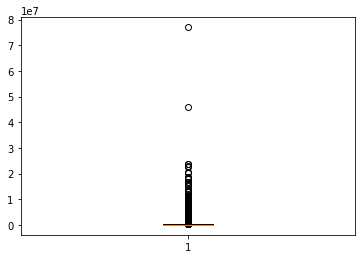

In [ ]:
plt.boxplot(df['Impressions'])
plt.show()

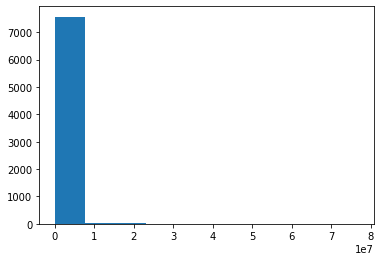

In [ ]:
plt.hist(df['Impressions'])
plt.show()

In [ ]:
from scipy.stats import zscore

z_scores = zscore(df['Impressions'])
for threshold in range (1, 5):
    print("The score threshold is: {}".format(threshold))
    print("The indicies of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

In [ ]:
q75, q25 = np.percentile(df['Impressions'], [75, 25])
iqr = q75 - q25

for threshold in np.arange(1, 5, 0.5):
    min_val = q25 - (iqr * threshold)
    max_val = q75 + (iqr * threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((df["Impressions"] > max_val) | (df["Impressions"] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 1233
The score threshold is: 1.5
Number of outliers is: 1054
The score threshold is: 2.0
Number of outliers is: 922
The score threshold is: 2.5
Number of outliers is: 817
The score threshold is: 3.0
Number of outliers is: 736
The score threshold is: 3.5
Number of outliers is: 658
The score threshold is: 4.0
Number of outliers is: 602
The score threshold is: 4.5
Number of outliers is: 555


In [ ]:
df = df[~((df['Impressions'] < (q25 - iqr)) | (df['Impressions'] > (q75 + iqr)))]

In [ ]:
df.shape

(6389, 35)

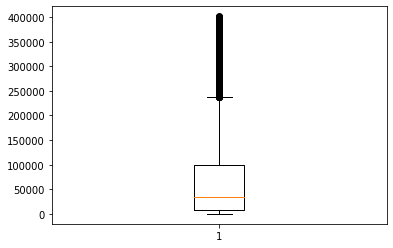

In [ ]:
plt.boxplot(df['Impressions'])
plt.show()

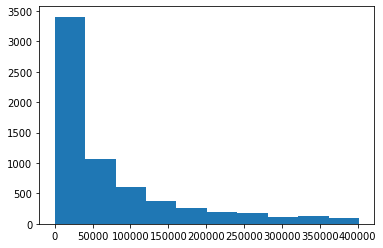

In [ ]:
plt.hist(df['Impressions'])
plt.show()

In [ ]:
q25, q75 = np.percentile(df['Impressions'], [25, 75])
iqr = q75 - q25

for threshold in np.arange(1, 5, 0.5):
    min_val = q25 - (iqr * threshold)
    max_val = q75 + (iqr * threshold)
    print("Thescore threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((df['Impressions'] > max_val) | (df['Impressions'] < min_val))[0]))
    ))

Thescore threshold is: 1.0
Number of outliers is: 739
Thescore threshold is: 1.5
Number of outliers is: 518
Thescore threshold is: 2.0
Number of outliers is: 325
Thescore threshold is: 2.5
Number of outliers is: 196
Thescore threshold is: 3.0
Number of outliers is: 59
Thescore threshold is: 3.5
Number of outliers is: 0
Thescore threshold is: 4.0
Number of outliers is: 0
Thescore threshold is: 4.5
Number of outliers is: 0


In [ ]:
df = df[~((df['Impressions'] < (q25 - iqr)) | (df['Impressions'] > (q75 + iqr)))]

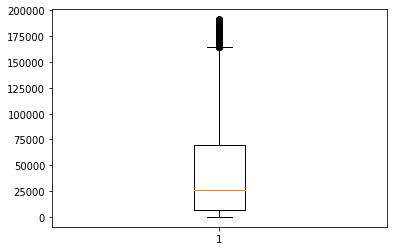

In [ ]:
plt.boxplot(df['Impressions'])
plt.show()

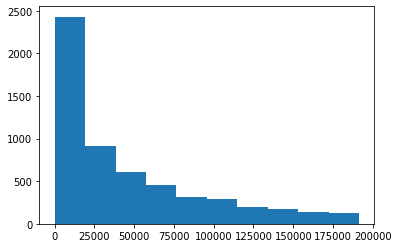

In [ ]:
plt.hist(df['Impressions'])
plt.show()

In [ ]:
df.shape

(5650, 35)

## Feature engineering

In [ ]:
df['StartDate'] = pd.to_datetime(df['StartDate'])
df['EndDate'] = pd.to_datetime(df['EndDate'])

df['Length'] = df['EndDate'] - df['StartDate']
df['Length'].sort_values(ascending=False)

2756    514 days 23:00:00
12509   247 days 07:25:15
5755    247 days 07:25:15
11047   247 days 07:25:15
12650   225 days 23:10:49
               ...       
12687                 NaT
12696                 NaT
12705                 NaT
12720                 NaT
12726                 NaT
Name: Length, Length: 11226, dtype: timedelta64[ns]

In [ ]:
df['Gender'].fillna('BOTH', inplace=True)
df['AgeBracket'].fillna('ALL', inplace=True)

In [ ]:
# Percent of missing values
df.isnull().sum() / len(df) * 100

ADID                                0.000000
CreativeUrl                         0.000000
Currency Code                       0.000000
Spend                               0.000000
Impressions                         0.000000
StartDate                           0.000000
EndDate                             8.601770
OrganizationName                    0.000000
BillingAddress                      0.000000
CandidateBallotInformation         40.991150
PayingAdvertiserName                0.000000
Gender                              0.000000
AgeBracket                          0.000000
CountryCode                         0.000000
Regions (Included)                 51.663717
Regions (Excluded)                 97.380531
Electoral Districts (Included)     97.823009
Electoral Districts (Excluded)    100.000000
Radius Targeting (Included)        92.584071
Radius Targeting (Excluded)        99.840708
Metros (Included)                  95.203540
Metros (Excluded)                 100.000000
Postal Cod

In [ ]:
df = df.drop(['Electoral Districts (Excluded)', 'Metros (Excluded)', 'Location Categories (Included)', 'Location Categories (Excluded)', 'OsType', 
              'Targeting Connection Type', 'Targeting Carrier (ISP)'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5650 entries, 0 to 12725
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype              
---  ------                          --------------  -----              
 0   ADID                            5650 non-null   object             
 1   CreativeUrl                     5650 non-null   object             
 2   Currency Code                   5650 non-null   object             
 3   Spend                           5650 non-null   int64              
 4   Impressions                     5650 non-null   int64              
 5   StartDate                       5650 non-null   datetime64[ns, UTC]
 6   EndDate                         5164 non-null   datetime64[ns, UTC]
 7   OrganizationName                5650 non-null   object             
 8   BillingAddress                  5650 non-null   object             
 9   CandidateBallotInformation      3334 non-null   object             
 10  PayingAdver

In [ ]:
df['Electoral Districts (Included)'].unique()

array([nan, 'California 45th District', 'Maine 2nd District',
       'Florida 26th District', 'Texas 24th District',
       'Florida 1st District,Florida 2nd District,Florida 3rd District,Florida 4th District,Florida 5th District',
       'Colorado 3rd District', 'Washington 10th District',
       'California 21st District', 'Georgia 7th District',
       'California 28th District', 'California 25th District',
       'New York 11th District', 'Illinois 14th District',
       'Indiana 5th District', 'North Carolina 8th District',
       'Texas 22nd District', 'Arizona 6th District',
       'Nebraska 2nd District', 'New York 22nd District',
       'Nebraska 3rd District',
       'Virginia 2nd District,Virginia 5th District,Virginia 7th District',
       'Minnesota 2nd District', 'California 23rd District'], dtype=object)

In [ ]:
df['Electoral Districts (Included)'].nunique()

23

In [ ]:
df['PayingAdvertiserName'].nunique()

315

In [ ]:
df.corr().loc[:, 'Impressions'].sort_values(ascending=False)d

Impressions    1.000000
Spend          0.714617
Name: Impressions, dtype: float64